In [3]:
import os
import numpy as np
import netCDF4 as netcdf4
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.units as munits
import cmaps  # for NCL colormaps
import cartopy.crs as ccrs
import cftime
import datetime
from matplotlib.dates import ConciseDateConverter
munits.registry[cftime.DatetimeNoLeap] = ConciseDateConverter()

In [4]:
def ann_mean(ds):
    """
    Description: compute the annual mean of a variable 
    Argument:
       ds: variable
    Return:
       ds_ann: annual mean
    """
    month_length = ds.time.dt.days_in_month
    wgts = month_length.groupby("time.year") / month_length.groupby("time.year").sum()
    ds_ann = (ds*wgts).groupby("time.year").sum()
    return ds_ann

In [5]:
def global_mean(ds, lat):
    """
    Description: compute the global mean (weigthed) of a variable 
    Argument:
       ds: variable
    Return:
       ds_mean: global mean
    """
    weights = np.cos(np.deg2rad(lat))
    ds_weigthed = ds.weighted(weights)
    ds_mean = ds_weigthed.mean(('lat','lon'))
    return ds_mean

In [6]:
import dask
from dask.distributed import wait
dask.__version__

'2025.12.0'

In [7]:
# Use this if computing annual means:
def get_ClusterClient():
    import dask
    from dask_jobqueue import PBSCluster
    from dask.distributed import Client
    cluster = PBSCluster(
        cores=1,
        memory='10GB',
        processes=1,
        queue='casper',
        resource_spec='select=1:ncpus=1:mem=10GB',
        project='NCGD0011',
        walltime='02:00:00',
        interface='ext',)

    dask.config.set({
        'distributed.dashboard.link':
        'https://jupyterhub.hpc.ucar.edu/stable/user/{USER}/proxy/{port}/status',
        'array.slicing.split_large_chunks': True
    })
    client = Client(cluster)
    return cluster, client

cluster, client = get_ClusterClient()
cluster.scale(jobs=30) 

/glade/u/apps/opt/miniforge/envs/npl-2026a/lib/python3.13/site-packages/dask_jobqueue/pbs.py:82: FutureWarning: project has been renamed to account as this kwarg was used wit -A option. You are still using it (please also check config files). If you did not set account yet, project will be respected for now, but it will be removed in a future release. If you already set account, project is ignored and you can remove it.
  warnings.warn(warn, FutureWarning)
/glade/u/apps/opt/miniforge/envs/npl-2026a/lib/python3.13/site-packages/dask_jobqueue/pbs.py:82: FutureWarning: project has been renamed to account as this kwarg was used wit -A option. You are still using it (please also check config files). If you did not set account yet, project will be respected for now, but it will be removed in a future release. If you already set account, project is ignored and you can remove it.
  warnings.warn(warn, FutureWarning)


In [8]:
dir = '/glade/campaign/cesm/collections/CESM2-CCISENS/b.e21.B1850.f09_g17.ccisens-final.esmfirebvoc.001/atm/proc/tseries/month_1/'
fin = 'b.e21.B1850.f09_g17.ccisens-final.esmfirebvoc.001.cam.h0.TREFHT.*.nc'

# keep only variables you want
def preprocess(ds):
    return ds[["TREFHT"]]

Temp_PI_1 = xr.open_mfdataset(os.path.join(dir,fin),
                       parallel=True, # use dask to read in parallel
                       combine="nested",  # combine files in order provided
                       concat_dim="time",  # concatentate files along time dimension
                       data_vars="minimal",  # only concatentate data variables with "time" dimension
                       coords="minimal",  # same as above for coordinate variables
                       compat="override",
                       preprocess=preprocess, # run this function on each dataset first before combining
                       #chunks={"nlat": "auto", "nlon": "auto"}, # choose simple
                       #chunks={"time": 1}, # choose simple
                      )
Temp_PI_1['time'] = Temp_PI_1.time - datetime.timedelta(15) #middle of the month
Temp_PI_1['time'] = Temp_PI_1.time + datetime.timedelta(365*1729)

In [9]:
dir = '/glade/campaign/cesm/collections/CESM2-CCISENS/b.e21.BHIST.f09_g17.ccisens-final.esmfirebvoc.001/atm/proc/tseries/month_1/'
fin = 'b.e21.BHIST.f09_g17.ccisens-final.esmfirebvoc.001.cam.h0.TREFHT.*.nc'

# keep only variables you want
def preprocess(ds):
    return ds[["TREFHT"]]

Temp_HIST_CCIS_1 = xr.open_mfdataset(os.path.join(dir,fin),
                       parallel=True, # use dask to read in parallel
                       combine="nested",  # combine files in order provided
                       concat_dim="time",  # concatentate files along time dimension
                       data_vars="minimal",  # only concatentate data variables with "time" dimension
                       coords="minimal",  # same as above for coordinate variables
                       compat="override",
                       preprocess=preprocess, # run this function on each dataset first before combining
                       #chunks={"nlat": "auto", "nlon": "auto"}, # choose simple
                       #chunks={"time": 1}, # choose simple
                      )
Temp_HIST_CCIS_1['time'] = Temp_HIST_CCIS_1.time - datetime.timedelta(15) #middle of the month

In [10]:
dir = '/glade/campaign/cesm/collections/CESM2-CCISENS/b.e21.BHIST.f09_g17.ccisens-final.esmfirebvoc.002/atm/proc/tseries/month_1/'
fin = 'b.e21.BHIST.f09_g17.ccisens-final.esmfirebvoc.002.cam.h0.TREFHT.*.nc'

# keep only variables you want
def preprocess(ds):
    return ds[["TREFHT"]]

Temp_HIST_CCIS_2 = xr.open_mfdataset(os.path.join(dir,fin),
                       parallel=True, # use dask to read in parallel
                       combine="nested",  # combine files in order provided
                       concat_dim="time",  # concatentate files along time dimension
                       data_vars="minimal",  # only concatentate data variables with "time" dimension
                       coords="minimal",  # same as above for coordinate variables
                       compat="override",
                       preprocess=preprocess, # run this function on each dataset first before combining
                       #chunks={"nlat": "auto", "nlon": "auto"}, # choose simple
                       #chunks={"time": 1}, # choose simple
                      )
Temp_HIST_CCIS_2['time'] = Temp_HIST_CCIS_2.time - datetime.timedelta(15) #middle of the month

In [11]:
dir = '/glade/campaign/cesm/collections/CESM2-CCISENS/b.e21.BHIST.f09_g17.ccisens-final.esmfirebvoc.003/atm/proc/tseries/month_1/'
fin = 'b.e21.BHIST.f09_g17.ccisens-final.esmfirebvoc.003.cam.h0.TREFHT.*.nc'

# keep only variables you want
def preprocess(ds):
    return ds[["TREFHT"]]

Temp_HIST_CCIS_3 = xr.open_mfdataset(os.path.join(dir,fin),
                       parallel=True, # use dask to read in parallel
                       combine="nested",  # combine files in order provided
                       concat_dim="time",  # concatentate files along time dimension
                       data_vars="minimal",  # only concatentate data variables with "time" dimension
                       coords="minimal",  # same as above for coordinate variables
                       compat="override",
                       preprocess=preprocess, # run this function on each dataset first before combining
                       #chunks={"nlat": "auto", "nlon": "auto"}, # choose simple
                       #chunks={"time": 1}, # choose simple
                      )
Temp_HIST_CCIS_3['time'] = Temp_HIST_CCIS_3.time - datetime.timedelta(15) #middle of the month

In [12]:
dir = '/glade/campaign/cesm/collections/CESM2-CCISENS/b.e21.BHIST.f09_g17.ccisens-final.esmfirebvoc.004/atm/proc/tseries/month_1/'
fin = 'b.e21.BHIST.f09_g17.ccisens-final.esmfirebvoc.004.cam.h0.TREFHT.*.nc'

# keep only variables you want
def preprocess(ds):
    return ds[["TREFHT"]]

Temp_HIST_CCIS_4 = xr.open_mfdataset(os.path.join(dir,fin),
                       parallel=True, # use dask to read in parallel
                       combine="nested",  # combine files in order provided
                       concat_dim="time",  # concatentate files along time dimension
                       data_vars="minimal",  # only concatentate data variables with "time" dimension
                       coords="minimal",  # same as above for coordinate variables
                       compat="override",
                       preprocess=preprocess, # run this function on each dataset first before combining
                       #chunks={"nlat": "auto", "nlon": "auto"}, # choose simple
                       #chunks={"time": 1}, # choose simple
                      )
Temp_HIST_CCIS_4['time'] = Temp_HIST_CCIS_4.time - datetime.timedelta(15) #middle of the month

In [13]:
dir = '/glade/campaign/cesm/collections/CESM2-CCISENS/b.e21.BHIST.f09_g17.ccisens-final.esmfirebvoc.005/atm/proc/tseries/month_1/'
fin = 'b.e21.BHIST.f09_g17.ccisens-final.esmfirebvoc.005.cam.h0.TREFHT.*.nc'

# keep only variables you want
def preprocess(ds):
    return ds[["TREFHT"]]

Temp_HIST_CCIS_5 = xr.open_mfdataset(os.path.join(dir,fin),
                       parallel=True, # use dask to read in parallel
                       combine="nested",  # combine files in order provided
                       concat_dim="time",  # concatentate files along time dimension
                       data_vars="minimal",  # only concatentate data variables with "time" dimension
                       coords="minimal",  # same as above for coordinate variables
                       compat="override",
                       preprocess=preprocess, # run this function on each dataset first before combining
                       #chunks={"nlat": "auto", "nlon": "auto"}, # choose simple
                       #chunks={"time": 1}, # choose simple
                      )
Temp_HIST_CCIS_5['time'] = Temp_HIST_CCIS_5.time - datetime.timedelta(15) #middle of the month

In [14]:
Temp_PI_1_ann = ann_mean(global_mean(Temp_PI_1, Temp_PI_1.lat))

In [15]:
Temp_PI_1_ann_mean30 = ann_mean(Temp_PI_1.TREFHT[90*12:120*12+1,:,:])

In [16]:
Temp_HIST_CCIS_1_ann = ann_mean(global_mean(Temp_HIST_CCIS_1, Temp_HIST_CCIS_1.lat)).load()

In [17]:
Temp_HIST_CCIS_1_ann_mean1850_1880 = ann_mean(Temp_HIST_CCIS_1.TREFHT[0:30*12+1,:,:])

In [18]:
Temp_HIST_CCIS_1_ann_mean1985_2014 = ann_mean(Temp_HIST_CCIS_1.TREFHT[135*12:165*12+1,:,:])

In [19]:
Temp_HIST_CCIS_2_ann = ann_mean(global_mean(Temp_HIST_CCIS_2, Temp_HIST_CCIS_2.lat)).load()

In [20]:
Temp_HIST_CCIS_2_ann_mean1850_1880 = ann_mean(Temp_HIST_CCIS_2.TREFHT[0:30*12+1,:,:])

In [21]:
Temp_HIST_CCIS_2_ann_mean1985_2014 = ann_mean(Temp_HIST_CCIS_2.TREFHT[135*12:165*12+1,:,:])

In [22]:
Temp_HIST_CCIS_3_ann = ann_mean(global_mean(Temp_HIST_CCIS_3, Temp_HIST_CCIS_3.lat)).load()

In [23]:
Temp_HIST_CCIS_3_ann_mean1850_1880 = ann_mean(Temp_HIST_CCIS_3.TREFHT[0:30*12+1,:,:])

In [24]:
Temp_HIST_CCIS_3_ann_mean1985_2014 = ann_mean(Temp_HIST_CCIS_3.TREFHT[135*12:165*12+1,:,:])

In [25]:
Temp_HIST_CCIS_4_ann = ann_mean(global_mean(Temp_HIST_CCIS_4, Temp_HIST_CCIS_4.lat)).load()

In [26]:
Temp_HIST_CCIS_4_ann_mean1850_1880 = ann_mean(Temp_HIST_CCIS_4.TREFHT[0:30*12+1,:,:])

In [27]:
Temp_HIST_CCIS_4_ann_mean1985_2014 = ann_mean(Temp_HIST_CCIS_4.TREFHT[135*12:165*12+1,:,:])

In [28]:
Temp_HIST_CCIS_5_ann = ann_mean(global_mean(Temp_HIST_CCIS_5, Temp_HIST_CCIS_5.lat)).load()

In [29]:
Temp_HIST_CCIS_5_ann_mean1850_1880 = ann_mean(Temp_HIST_CCIS_5.TREFHT[0:30*12+1,:,:])

In [30]:
Temp_HIST_CCIS_5_ann_mean1985_2014 = ann_mean(Temp_HIST_CCIS_5.TREFHT[135*12:165*12+1,:,:])

In [31]:
Temp_HIST_CCIS_ens_ann = (Temp_HIST_CCIS_1_ann + Temp_HIST_CCIS_1_ann + Temp_HIST_CCIS_1_ann + Temp_HIST_CCIS_4_ann + Temp_HIST_CCIS_5_ann) / 5.0

In [32]:
Temp_HIST_CCIS_ens_ann_mean1850_1880 = (Temp_HIST_CCIS_1_ann_mean1850_1880 + Temp_HIST_CCIS_2_ann_mean1850_1880 + Temp_HIST_CCIS_3_ann_mean1850_1880 + Temp_HIST_CCIS_4_ann_mean1850_1880 + Temp_HIST_CCIS_5_ann_mean1850_1880) / 5.0

In [33]:
Temp_HIST_CCIS_ens_ann_mean1985_2014 = (Temp_HIST_CCIS_1_ann_mean1985_2014 + Temp_HIST_CCIS_2_ann_mean1985_2014 + Temp_HIST_CCIS_3_ann_mean1985_2014 + Temp_HIST_CCIS_4_ann_mean1985_2014 + Temp_HIST_CCIS_5_ann_mean1985_2014) / 5.0

In [34]:
dir = '/glade/campaign/cesm/collections/CESM2-LE/atm/proc/tseries/month_1/TREFHT/'
fin = 'b.e21.BHISTsmbb.f09_g17.LE2-1011.001.cam.h0.TREFHT.*.nc'

# keep only variables you want
def preprocess(ds):
    return ds[["TREFHT"]]

Temp_HIST_LENS_1 = xr.open_mfdataset(os.path.join(dir,fin),
                       parallel=True, # use dask to read in parallel
                       combine="nested",  # combine files in order provided
                       concat_dim="time",  # concatentate files along time dimension
                       data_vars="minimal",  # only concatentate data variables with "time" dimension
                       coords="minimal",  # same as above for coordinate variables
                       compat="override",
                       preprocess=preprocess, # run this function on each dataset first before combining
                       #chunks={"nlat": "auto", "nlon": "auto"}, # choose simple
                       #chunks={"time": 1}, # choose simple
                      )

Temp_HIST_LENS_1['time'] = Temp_HIST_LENS_1.time - datetime.timedelta(15) #middle of the month

In [35]:
dir = '/glade/campaign/cesm/collections/CESM2-LE/atm/proc/tseries/month_1/TREFHT/'
fin = 'b.e21.BHISTsmbb.f09_g17.LE2-1031.002.cam.h0.TREFHT.*.nc'

# keep only variables you want
def preprocess(ds):
    return ds[["TREFHT"]]

Temp_HIST_LENS_2 = xr.open_mfdataset(os.path.join(dir,fin),
                       parallel=True, # use dask to read in parallel
                       combine="nested",  # combine files in order provided
                       concat_dim="time",  # concatentate files along time dimension
                       data_vars="minimal",  # only concatentate data variables with "time" dimension
                       coords="minimal",  # same as above for coordinate variables
                       compat="override",
                       preprocess=preprocess, # run this function on each dataset first before combining
                       #chunks={"nlat": "auto", "nlon": "auto"}, # choose simple
                       #chunks={"time": 1}, # choose simple
                      )

Temp_HIST_LENS_2['time'] = Temp_HIST_LENS_2.time - datetime.timedelta(15) #middle of the month

In [36]:
dir = '/glade/campaign/cesm/collections/CESM2-LE/atm/proc/tseries/month_1/TREFHT/'
fin = 'b.e21.BHISTsmbb.f09_g17.LE2-1051.003.cam.h0.TREFHT.*.nc'

# keep only variables you want
def preprocess(ds):
    return ds[["TREFHT"]]

Temp_HIST_LENS_3 = xr.open_mfdataset(os.path.join(dir,fin),
                       parallel=True, # use dask to read in parallel
                       combine="nested",  # combine files in order provided
                       concat_dim="time",  # concatentate files along time dimension
                       data_vars="minimal",  # only concatentate data variables with "time" dimension
                       coords="minimal",  # same as above for coordinate variables
                       compat="override",
                       preprocess=preprocess, # run this function on each dataset first before combining
                       #chunks={"nlat": "auto", "nlon": "auto"}, # choose simple
                       #chunks={"time": 1}, # choose simple
                      )

Temp_HIST_LENS_3['time'] = Temp_HIST_LENS_3.time - datetime.timedelta(15) #middle of the month

In [37]:
dir = '/glade/campaign/cesm/collections/CESM2-LE/atm/proc/tseries/month_1/TREFHT/'
fin = 'b.e21.BHISTsmbb.f09_g17.LE2-1071.004.cam.h0.TREFHT.*.nc'

# keep only variables you want
def preprocess(ds):
    return ds[["TREFHT"]]

Temp_HIST_LENS_4 = xr.open_mfdataset(os.path.join(dir,fin),
                       parallel=True, # use dask to read in parallel
                       combine="nested",  # combine files in order provided
                       concat_dim="time",  # concatentate files along time dimension
                       data_vars="minimal",  # only concatentate data variables with "time" dimension
                       coords="minimal",  # same as above for coordinate variables
                       compat="override",
                       preprocess=preprocess, # run this function on each dataset first before combining
                       #chunks={"nlat": "auto", "nlon": "auto"}, # choose simple
                       #chunks={"time": 1}, # choose simple
                      )

Temp_HIST_LENS_4['time'] = Temp_HIST_LENS_4.time - datetime.timedelta(15) #middle of the month

In [38]:
dir = '/glade/campaign/cesm/collections/CESM2-LE/atm/proc/tseries/month_1/TREFHT/'
fin = 'b.e21.BHISTsmbb.f09_g17.LE2-1091.005.cam.h0.TREFHT.*.nc'

# keep only variables you want
def preprocess(ds):
    return ds[["TREFHT"]]

Temp_HIST_LENS_5 = xr.open_mfdataset(os.path.join(dir,fin),
                       parallel=True, # use dask to read in parallel
                       combine="nested",  # combine files in order provided
                       concat_dim="time",  # concatentate files along time dimension
                       data_vars="minimal",  # only concatentate data variables with "time" dimension
                       coords="minimal",  # same as above for coordinate variables
                       compat="override",
                       preprocess=preprocess, # run this function on each dataset first before combining
                       #chunks={"nlat": "auto", "nlon": "auto"}, # choose simple
                       #chunks={"time": 1}, # choose simple
                      )

Temp_HIST_LENS_5['time'] = Temp_HIST_LENS_5.time - datetime.timedelta(15) #middle of the month

In [39]:
Temp_HIST_LENS_1_ann = ann_mean(global_mean(Temp_HIST_LENS_1, Temp_HIST_LENS_1.lat)).load()

In [40]:
Temp_HIST_LENS_1_ann_mean1850_1880 = ann_mean(Temp_HIST_LENS_1.TREFHT[0:30*12+1,:,:])

In [41]:
Temp_HIST_LENS_1_ann_mean1985_2014 = ann_mean(Temp_HIST_LENS_1.TREFHT[135*12:165*12+1,:,:])

In [42]:
Temp_HIST_LENS_2_ann = ann_mean(global_mean(Temp_HIST_LENS_2, Temp_HIST_LENS_2.lat)).load()

In [43]:
Temp_HIST_LENS_2_ann_mean1850_1880 = ann_mean(Temp_HIST_LENS_2.TREFHT[0:30*12+1,:,:])

In [44]:
Temp_HIST_LENS_2_ann_mean1985_2014 = ann_mean(Temp_HIST_LENS_2.TREFHT[135*12:165*12+1,:,:])

In [45]:
Temp_HIST_LENS_3_ann = ann_mean(global_mean(Temp_HIST_LENS_3, Temp_HIST_LENS_3.lat)).load()

In [46]:
Temp_HIST_LENS_3_ann_mean1850_1880 = ann_mean(Temp_HIST_LENS_3.TREFHT[0:30*12+1,:,:])

In [47]:
Temp_HIST_LENS_3_ann_mean1985_2014 = ann_mean(Temp_HIST_LENS_3.TREFHT[135*12:165*12+1,:,:])

In [48]:
Temp_HIST_LENS_4_ann = ann_mean(global_mean(Temp_HIST_LENS_4, Temp_HIST_LENS_4.lat)).load()

In [49]:
Temp_HIST_LENS_4_ann_mean1850_1880 = ann_mean(Temp_HIST_LENS_4.TREFHT[0:30*12+1,:,:])

In [50]:
Temp_HIST_LENS_4_ann_mean1985_2014 = ann_mean(Temp_HIST_LENS_4.TREFHT[135*12:165*12+1,:,:])

In [51]:
Temp_HIST_LENS_5_ann = ann_mean(global_mean(Temp_HIST_LENS_5, Temp_HIST_LENS_5.lat)).load()

In [52]:
Temp_HIST_LENS_5_ann_mean1850_1880 = ann_mean(Temp_HIST_LENS_5.TREFHT[0:30*12+1,:,:])

In [53]:
Temp_HIST_LENS_5_ann_mean1985_2014 = ann_mean(Temp_HIST_LENS_5.TREFHT[135*12:165*12+1,:,:])

In [54]:
Temp_HIST_LENS_ens_ann = (Temp_HIST_LENS_1_ann + Temp_HIST_LENS_1_ann + Temp_HIST_LENS_1_ann + Temp_HIST_LENS_4_ann + Temp_HIST_LENS_5_ann) / 5.0

In [55]:
Temp_HIST_LENS_ens_ann_mean1850_1880 = (Temp_HIST_LENS_1_ann_mean1850_1880 + Temp_HIST_LENS_2_ann_mean1850_1880 + Temp_HIST_LENS_3_ann_mean1850_1880 + Temp_HIST_LENS_4_ann_mean1850_1880 + Temp_HIST_LENS_5_ann_mean1850_1880) / 5.0

In [56]:
Temp_HIST_LENS_ens_ann_mean1985_2014 = (Temp_HIST_LENS_1_ann_mean1985_2014 + Temp_HIST_LENS_2_ann_mean1985_2014 + Temp_HIST_LENS_3_ann_mean1985_2014 + Temp_HIST_LENS_4_ann_mean1985_2014 + Temp_HIST_LENS_5_ann_mean1985_2014) / 5.0

Text(0.5, 1.0, 'Change in Surface Temp')

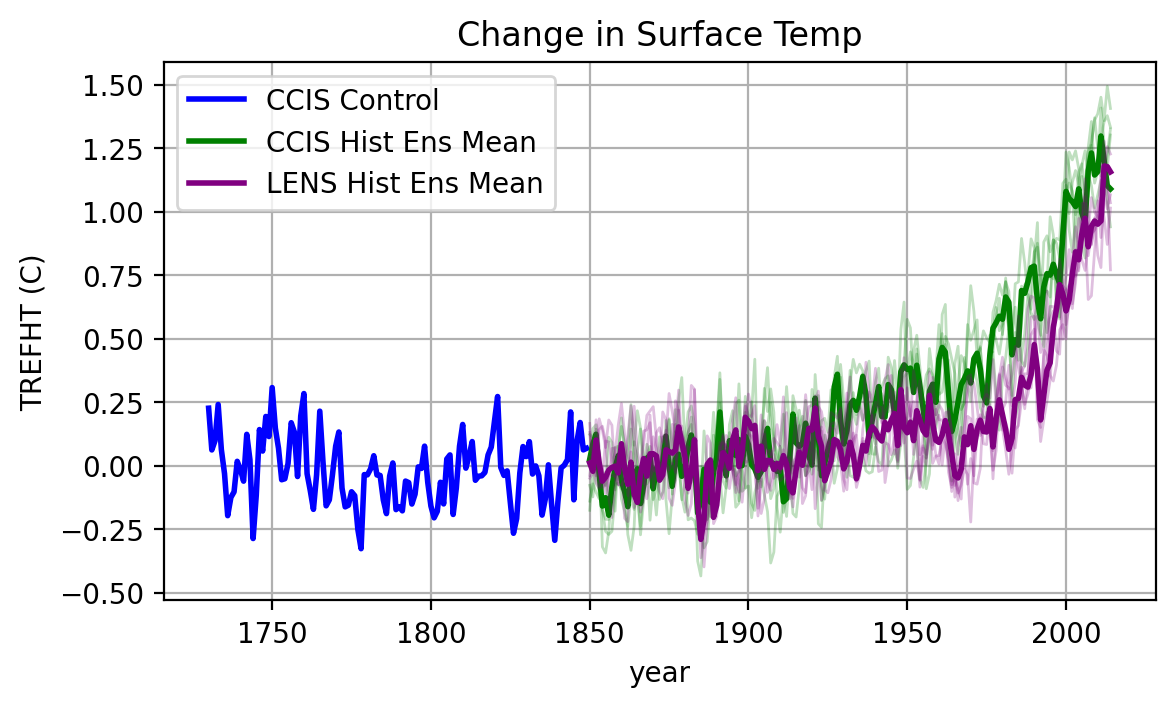

In [57]:
plt.figure(dpi=200)
ax = plt.gca()
ax.set_aspect(400/5*1)
plt.plot(Temp_PI_1_ann.year[0:400], Temp_PI_1_ann.TREFHT[0:400]-286.9,color="Blue",linewidth=2,linestyle="solid",label='CCIS Control')

plt.plot(Temp_HIST_CCIS_1_ann.year, Temp_HIST_CCIS_1_ann.TREFHT-286.9,color="Green",linewidth=1,linestyle="solid",alpha=0.25)
plt.plot(Temp_HIST_CCIS_2_ann.year, Temp_HIST_CCIS_2_ann.TREFHT-286.9,color="Green",linewidth=1,linestyle="solid",alpha=0.25)
plt.plot(Temp_HIST_CCIS_3_ann.year, Temp_HIST_CCIS_3_ann.TREFHT-286.9,color="Green",linewidth=1,linestyle="solid",alpha=0.25)
plt.plot(Temp_HIST_CCIS_4_ann.year, Temp_HIST_CCIS_4_ann.TREFHT-286.9,color="Green",linewidth=1,linestyle="solid",alpha=0.25)
plt.plot(Temp_HIST_CCIS_5_ann.year, Temp_HIST_CCIS_5_ann.TREFHT-286.9,color="Green",linewidth=1,linestyle="solid",alpha=0.25)
plt.plot(Temp_HIST_CCIS_ens_ann.year, Temp_HIST_CCIS_ens_ann.TREFHT-286.9,color="Green",linewidth=2,linestyle="solid",label='CCIS Hist Ens Mean')

plt.plot(Temp_HIST_LENS_1_ann.year, Temp_HIST_LENS_1_ann.TREFHT-287.25,color="Purple",linewidth=1,linestyle="solid",alpha=0.25)
plt.plot(Temp_HIST_LENS_2_ann.year, Temp_HIST_LENS_2_ann.TREFHT-287.25,color="Purple",linewidth=1,linestyle="solid",alpha=0.25)
plt.plot(Temp_HIST_LENS_3_ann.year, Temp_HIST_LENS_3_ann.TREFHT-287.25,color="Purple",linewidth=1,linestyle="solid",alpha=0.25)
plt.plot(Temp_HIST_LENS_4_ann.year, Temp_HIST_LENS_4_ann.TREFHT-287.25,color="Purple",linewidth=1,linestyle="solid",alpha=0.25)
plt.plot(Temp_HIST_LENS_5_ann.year, Temp_HIST_LENS_5_ann.TREFHT-287.25,color="Purple",linewidth=1,linestyle="solid",alpha=0.25)
plt.plot(Temp_HIST_LENS_ens_ann.year, Temp_HIST_LENS_ens_ann.TREFHT-287.25,color="Purple",linewidth=2,linestyle="solid",label='LENS Hist Ens Mean')

plt.legend()

plt.xlabel('year')
plt.ylabel('TREFHT (C)')
plt.grid()
plt.title('Change in Surface Temp')

In [58]:
Temp_HIST_CCIS_ens_coeffs = Temp_HIST_CCIS_ens_ann.TREFHT.polyfit(dim="year", deg=6)
Temp_HIST_CCIS_ens_fit = xr.polyval(Temp_HIST_CCIS_ens_ann.year, Temp_HIST_CCIS_ens_coeffs).polyfit_coefficients
Temp_HIST_CCIS_ens_trend = Temp_HIST_CCIS_ens_coeffs.polyfit_coefficients.sel(degree=1)

In [59]:
Temp_HIST_LENS_ens_coeffs = Temp_HIST_LENS_ens_ann.TREFHT.polyfit(dim="year", deg=6)
Temp_HIST_LENS_ens_fit = xr.polyval(Temp_HIST_LENS_ens_ann.year, Temp_HIST_LENS_ens_coeffs).polyfit_coefficients
Temp_HIST_LENS_ens_trend = Temp_HIST_LENS_ens_coeffs.polyfit_coefficients.sel(degree=1)

Text(0.5, 1.0, 'Change in Surface Temp')

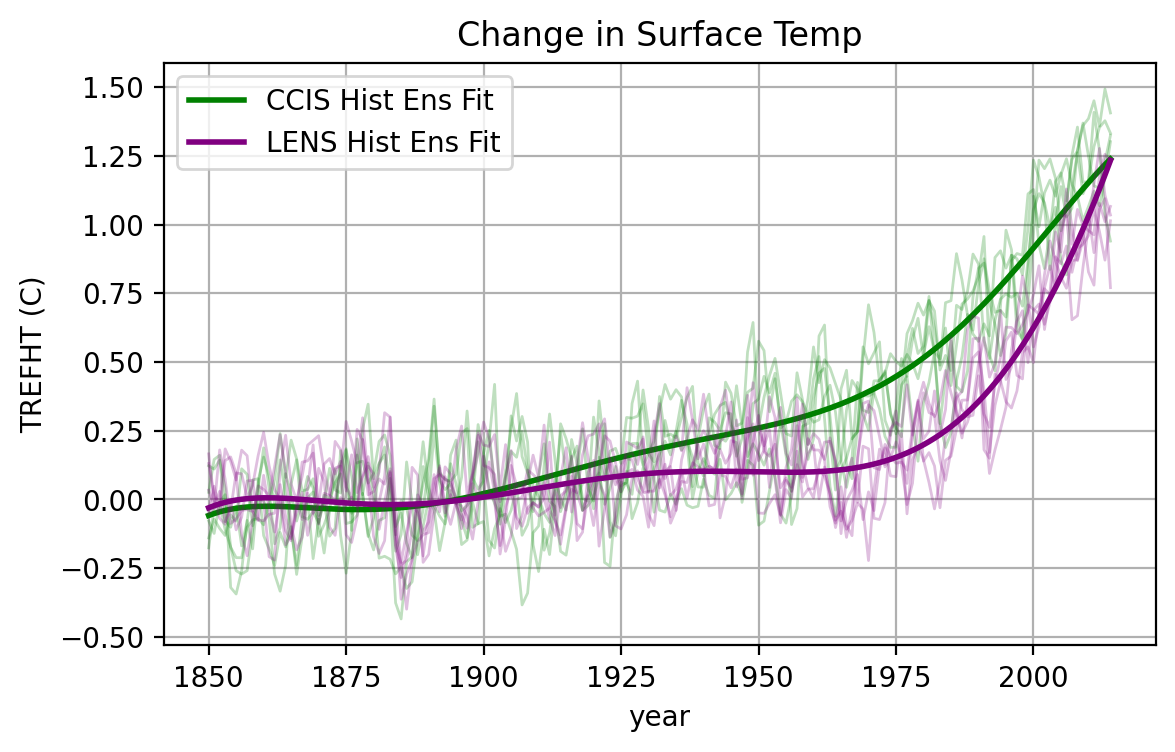

In [60]:
plt.figure(dpi=200)
ax = plt.gca()
ax.set_aspect(250/5*1)

plt.plot(Temp_HIST_CCIS_1_ann.year, Temp_HIST_CCIS_1_ann.TREFHT-286.9,color="Green",linewidth=1,linestyle="solid",alpha=0.25)
plt.plot(Temp_HIST_CCIS_2_ann.year, Temp_HIST_CCIS_2_ann.TREFHT-286.9,color="Green",linewidth=1,linestyle="solid",alpha=0.25)
plt.plot(Temp_HIST_CCIS_3_ann.year, Temp_HIST_CCIS_3_ann.TREFHT-286.9,color="Green",linewidth=1,linestyle="solid",alpha=0.25)
plt.plot(Temp_HIST_CCIS_4_ann.year, Temp_HIST_CCIS_4_ann.TREFHT-286.9,color="Green",linewidth=1,linestyle="solid",alpha=0.25)
plt.plot(Temp_HIST_CCIS_5_ann.year, Temp_HIST_CCIS_5_ann.TREFHT-286.9,color="Green",linewidth=1,linestyle="solid",alpha=0.25)
plt.plot(Temp_HIST_CCIS_ens_ann.year, Temp_HIST_CCIS_ens_fit-286.9,color="Green",linewidth=2,linestyle="solid",label='CCIS Hist Ens Fit')

plt.plot(Temp_HIST_LENS_1_ann.year, Temp_HIST_LENS_1_ann.TREFHT-287.25,color="Purple",linewidth=1,linestyle="solid",alpha=0.25)
plt.plot(Temp_HIST_LENS_2_ann.year, Temp_HIST_LENS_2_ann.TREFHT-287.25,color="Purple",linewidth=1,linestyle="solid",alpha=0.25)
plt.plot(Temp_HIST_LENS_3_ann.year, Temp_HIST_LENS_3_ann.TREFHT-287.25,color="Purple",linewidth=1,linestyle="solid",alpha=0.25)
plt.plot(Temp_HIST_LENS_4_ann.year, Temp_HIST_LENS_4_ann.TREFHT-287.25,color="Purple",linewidth=1,linestyle="solid",alpha=0.25)
plt.plot(Temp_HIST_LENS_5_ann.year, Temp_HIST_LENS_5_ann.TREFHT-287.25,color="Purple",linewidth=1,linestyle="solid",alpha=0.25)
plt.plot(Temp_HIST_LENS_ens_ann.year, Temp_HIST_LENS_ens_fit-287.25,color="Purple",linewidth=2,linestyle="solid",label='LENS Hist Ens Fit')

plt.legend()

plt.xlabel('year')
plt.ylabel('TREFHT (C)')
plt.grid()
plt.title('Change in Surface Temp')

In [61]:
TempDiff_contour_levels = [-7.5, -5, -4, -3, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3, 4, 5, 7.5]
TempDiff_color_map = cmaps.ncl_default

In [62]:
Temp_HIST_CCIS_ens_ann_mean_diff = Temp_HIST_CCIS_ens_ann_mean1985_2014 - Temp_HIST_CCIS_ens_ann_mean1850_1880

In [63]:
Temp_HIST_LENS_ens_ann_mean_diff = Temp_HIST_LENS_ens_ann_mean1985_2014 - Temp_HIST_LENS_ens_ann_mean1850_1880

In [64]:
lats = Temp_HIST_CCIS_ens_ann_mean_diff.lat
lons = Temp_HIST_CCIS_ens_ann_mean_diff.lon
lonsdim = len(lons)
lonsshift = np.arange(-0.625,0.625,1.25/float(lonsdim))
lons = lons + lonsshift


In [65]:
figWidth = 15
figHeight = 8
nplot_rows = 1
nplot_cols = 2
TempCCIS_data = (Temp_HIST_CCIS_ens_ann_mean1985_2014.mean(dim='year') - Temp_HIST_CCIS_ens_ann_mean1850_1880.mean(dim='year')) # Temp_HIST_CCIS_1_ann_mean_diff.mean(dim='year')
TempLENS_data = (Temp_HIST_LENS_ens_ann_mean1985_2014.mean(dim='year') - Temp_HIST_LENS_ens_ann_mean1850_1880.mean(dim='year')) # Temp_HIST_LENS_1_ann_mean_diff.mean(dim='year')


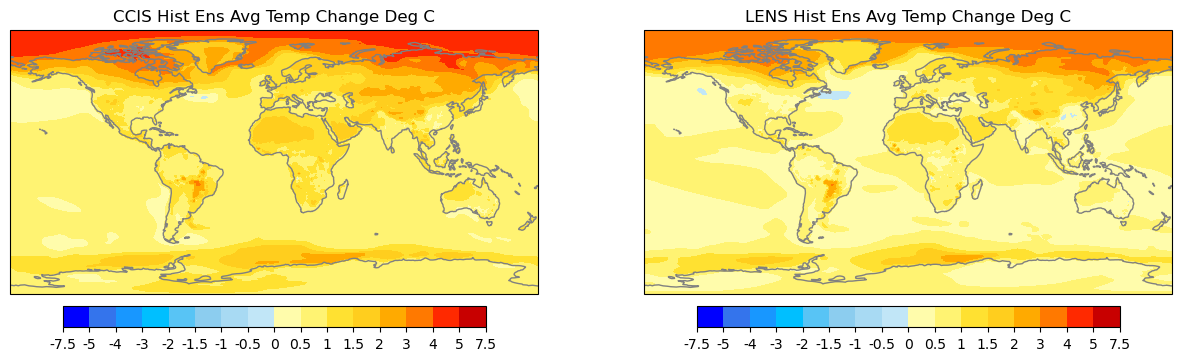

In [66]:
TempCCIS_plot_label = "CCIS Hist Ens Avg Temp Change Deg C"
TempLENS_plot_label = "LENS Hist Ens Avg Temp Change Deg C"

Temp_fig = plt.figure(figsize=(figWidth,figHeight))

TempCCIS_plot_index = 1
TempLENS_plot_index = 2

TempCCIS_ax = Temp_fig.add_subplot(nplot_rows, nplot_cols, TempCCIS_plot_index, projection=ccrs.PlateCarree(central_longitude=0))
TempCCIS_cplot = plt.contourf(lons, lats, TempCCIS_data,
                     levels = TempDiff_contour_levels,
                     cmap = TempDiff_color_map)
TempCCIS_ax.coastlines(color = 'grey')
TempCCIS_ax.title.set_text(TempCCIS_plot_label)

TempCCIS_cbar = Temp_fig.colorbar(TempCCIS_cplot, orientation='horizontal', shrink = 0.8, pad = 0.02)
TempCCIS_cbar.set_ticks(TempDiff_contour_levels)
TempCCIS_cbar.set_ticklabels(TempDiff_contour_levels)

TempLENS_ax = Temp_fig.add_subplot(nplot_rows, nplot_cols, TempLENS_plot_index, projection=ccrs.PlateCarree(central_longitude=0))
TempLENS_cplot = plt.contourf(lons, lats, TempLENS_data,
                     levels = TempDiff_contour_levels,
                     cmap = TempDiff_color_map)
TempLENS_ax.coastlines(color = 'grey')
TempLENS_ax.title.set_text(TempLENS_plot_label)

TempLENS_cbar = Temp_fig.colorbar(TempLENS_cplot, orientation='horizontal', shrink = 0.8, pad = 0.02)
TempLENS_cbar.set_ticks(TempDiff_contour_levels)
TempLENS_cbar.set_ticklabels(TempDiff_contour_levels)



In [67]:
# Close out Dask Cluster and release workers:
# NOTE:  only run this cell to terminate Dask Cluster!
cluster.close()
client.close()

/glade/u/apps/opt/miniforge/envs/npl-2026a/lib/python3.13/site-packages/dask_jobqueue/pbs.py:82: FutureWarning: project has been renamed to account as this kwarg was used wit -A option. You are still using it (please also check config files). If you did not set account yet, project will be respected for now, but it will be removed in a future release. If you already set account, project is ignored and you can remove it.
  warnings.warn(warn, FutureWarning)
